# 데이터 확인 

In [2]:
from datetime import datetime
import pickle
from collections import Counter

import matplotlib.pyplot as plt

#### 데이터 정보 확인

- entry_id (id 역할)
- published 
- title 
- categories
- links
- summary  (page_content)

##### 논문 날짜 수집 기간 확인 (published date 기준, 2016 ~ 2024) 

In [3]:
with open ("../data_files/paper_metadata/arxiv_ascending_20161001_20230920.pkl", 'rb') as f:
    paper = pickle.load(f)
    
with open ("../data_files/paper_metadata/arxiv_descending_2024_20160927.pkl", 'rb') as f:
    after2023 = pickle.load(f)

paper.extend(after2023)

In [6]:
print("총 metadata 수: ", len(paper))
sorted_paper = sorted(paper, key=lambda x: x['published'])

pub_dates= [datetime.strftime(paper['published'], format="%Y-%m-%d")  for paper in sorted_paper]
pub_year = [int(datetime.strftime(paper['published'], format="%Y"))  for paper in sorted_paper]

print("논문 수집 기간:", sorted(pub_dates)[0], '~', sorted(pub_dates)[-1])

총 metadata 수:  70000
논문 수집 기간: 2016-10-01 ~ 2024-12-24


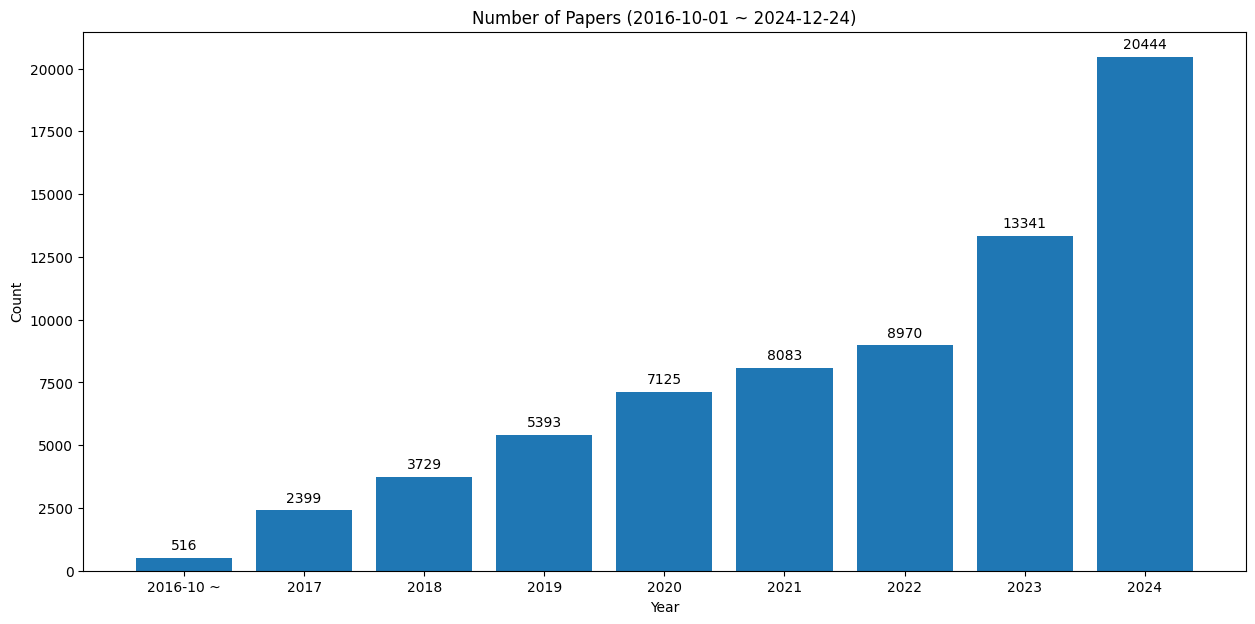

In [7]:
year_count = Counter(pub_year)
x_positions = range(len(year_count))   

new_xticks = list(year_count.keys())
new_xticks = [str(year) for year in new_xticks]
new_xticks[0] = '2016-10 ~'

plt.figure(figsize=(15, 7))
bars = plt.bar(x_positions, year_count.values())
plt.xticks(ticks=x_positions, labels=new_xticks)

plt.title("Number of Papers (2016-10-01 ~ 2024-12-24)")
plt.xlabel("Year")
plt.ylabel("Count")


# 막대 중앙에 값 표시
for bar in bars:
    height = bar.get_height()  # 막대의 높이 (값)
    plt.text(bar.get_x() + bar.get_width() / 2,  # 막대의 중앙 x좌표
             height + 500,                        # 텍스트 y좌표 (중앙)
             str(height),                       # 텍스트 (값)
             ha='center',                       # 수평 정렬
             va='center',                       # 수직 정렬
             fontsize=10,                       # 글씨 크기
            )         

plt.show()